## **Computer Vision**

## **Problem Statement: Automated Diagnosis of Diabetic Retinopathy**

### **Background**
Diabetic Retinopathy (DR) is a serious complication of diabetes that damages the retina, potentially leading to vision loss. With the rising prevalence of diabetes, DR has become a significant public health concern. Early detection and timely intervention are vital for preventing severe vision impairment and improving patient outcomes. However, the current methods of diagnosing DR through manual interpretation of retinal images are labor-intensive and prone to human error, making them inefficient and inconsistent.

### **Objective**
The goal is to develop an automated and accurate tool for diagnosing Diabetic Retinopathy using retinal images. This tool should assist healthcare professionals by providing consistent and reliable grading of DR severity, thus facilitating early intervention and personalized treatment plans.

### Dataset Description
The dataset comprises a large collection of high-resolution retinal images captured under various imaging conditions. Each image has been assessed by a medical professional, who determined the presence of Diabetic Retinopathy and assigned a binary rating:
- 0: Diabetic Retinopathy
- 1: No Diabetic Retinopathy

### **Challenges**
1. **Subjectivity and Manual Labor:** Current methods rely on subjective assessments, which can lead to inconsistencies and inefficiencies.
2. **Increasing Prevalence:** The rising number of diabetes cases and the limited availability of ophthalmologists exacerbate the need for timely and accurate screening.
3. **Imaging Variability:** The dataset includes images captured under different conditions, which may affect the consistency of the automated diagnosis.

### **Solution**
To address these challenges, an automated system utilizing advanced machine learning techniques will be developed. This system aims to:
- Accurately detect and grade Diabetic Retinopathy from retinal images.
- Provide consistent and reliable results, reducing the dependence on subjective human interpretation.
- Enable early detection and intervention, improving patient outcomes.

### **Impact**
Implementing an automated DR diagnosis system will streamline the screening process, reduce the workload on healthcare professionals, and ensure timely and accurate diagnosis. This will ultimately lead to better management of Diabetic Retinopathy and improved vision health for patients with diabetes.

In [2]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from pathlib import Path
import random

In [3]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [6]:
# Mount Google Drive (specific to Google Colab usage)
from google.colab import drive
drive.mount('/content/drive')

# Update the path to point to the directory in your Google Drive
data_root_path = '/content/drive/My Drive/CNN/Diabetic_Retinopathy/train'
total_classes = os.listdir(data_root_path)
print(total_classes)

Mounted at /content/drive
['DR', 'No_DR']


LOADING THE DATA


The dataset comprises retinal images categorized into different classes stored in a directory. The images were loaded and converted into numpy arrays for model training and evaluation.



In [7]:
# Function to load images and labels
def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(total_classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)


In [8]:

# Load data from the specified path
X, y = load_data(data_root_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [9]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) #The dataset was split into training and validation sets using an 80-20 split.


In [10]:
# Normalize the data
X_train = X_train / 255.0
X_val = X_val / 255.0
#The pixel values of the images were normalized to fall between 0 and 1 by dividing by 255.0.

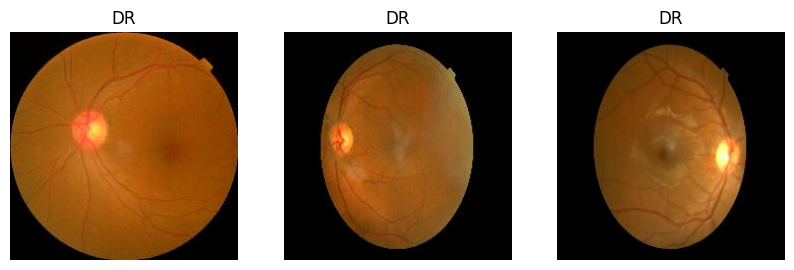

In [11]:
# Identify the class label for Diabetic Retinopathy (DR)
DR_label = 1

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

# Visualize the DR images
plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()

#The first three images belonging to the DR class were visualized to understand the features of DR.

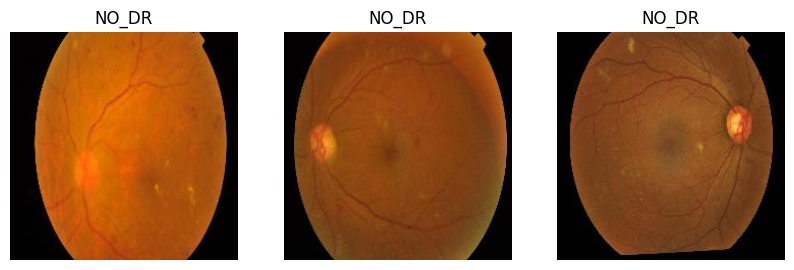

In [12]:
# Identify the class label for non-DR images
NO_DR_label = 0

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


# Visualize the non-DR images
plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()

#The first three images belonging to the non-DR class were visualized.

Defining the model

The model used is a Sequential CNN with the following layers:

Conv2D (32 filters, 3x3 kernel, ReLU activation)

MaxPooling2D (2x2 pool size)

Conv2D (64 filters, 3x3 kernel, ReLU activation)

MaxPooling2D (2x2 pool size)
Conv2D (128 filters, 3x3 kernel, ReLU activation)

MaxPooling2D (2x2 pool size)

Flatten

Dense (128 units, ReLU activation)

Dense (1 unit, Sigmoid activation)


In [13]:
# Define the model architecture

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [14]:
# Compile the model

model.compile(optimizer='adam',
              loss='binary_crossentropy', #loss function for binary classification
              metrics=['accuracy'])

#The model was compiled using the Adam optimizer and binary crossentropy loss function. It was then trained for 10 epochs.

#Training the model

In [16]:
# Check for unique values in y_train
unique_labels = np.unique(y_train)
print(unique_labels)

# If there are labels other than 0 and 1, adjust them accordingly
# For example, if labels are 1 and 2, subtract 1 to make them 0 and 1
if np.any((y_train != 0) & (y_train != 1)):
  y_train = y_train - 1  # Adjust as needed based on the actual labels

# Similarly, check and adjust y_val if necessary
unique_val_labels = np.unique(y_val)
print(unique_val_labels)

if np.any((y_val != 0) & (y_val != 1)):
  y_val = y_val - 1  

# train the model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_val, y_val))

[0 1]
[0 1]
Epoch 1/10
52/52 [==============================] - 184s 4s/step - loss: 0.2211 - accuracy: 0.9247 - val_loss: 0.3167 - val_accuracy: 0.8534
Epoch 2/10
52/52 [==============================] - 184s 4s/step - loss: 0.2034 - accuracy: 0.9265 - val_loss: 0.2059 - val_accuracy: 0.9303
Epoch 3/10
52/52 [==============================] - 177s 3s/step - loss: 0.1835 - accuracy: 0.9331 - val_loss: 0.1981 - val_accuracy: 0.9183
Epoch 4/10
52/52 [==============================] - 175s 3s/step - loss: 0.1863 - accuracy: 0.9398 - val_loss: 0.1932 - val_accuracy: 0.9303
Epoch 5/10
52/52 [==============================] - 182s 3s/step - loss: 0.1627 - accuracy: 0.9434 - val_loss: 0.1849 - val_accuracy: 0.9303
Epoch 6/10
52/52 [==============================] - 191s 4s/step - loss: 0.1558 - accuracy: 0.9470 - val_loss: 0.2188 - val_accuracy: 0.9255
Epoch 7/10
52/52 [==============================] - 188s 4s/step - loss: 0.1776 - accuracy: 0.9434 - val_loss: 0.1713 - val_accuracy: 0.9399
E

# Evaluating the model

In [17]:
# Evaluate the model on validation data
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print(f"Test accuracy: {test_acc}")

#The model was evaluated on the validation set to assess its accuracy.

13/13 - 17s - loss: 0.1569 - accuracy: 0.9375 - 17s/epoch - 1s/step
Test accuracy: 0.9375


#Visualize the training results

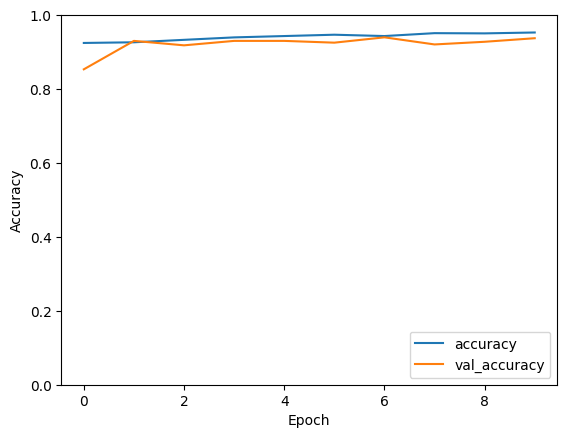

In [18]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#The training and validation accuracy over epochs were plotted to visualize the model's performance.